In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import re
from collections import Counter
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
df_MBTI= pd.read_csv('/content/drive/MyDrive/MBTI 500.csv')
df_MBTI.head(2)

,posts,type
0,know intj tool use interaction people excuse a...,INTJ
1,rap music ehh opp yeah know valid well know fa...,INTJ


From the above dataset the following was analyzed:
- URLS (Youtube and HTTP links are present)- 
- Single Post is seperated by '|||'
- A combination of upper and lowercase letters
- Unwanted symbols (emojis)
- Incorrect spelling
- Punctuation

In [5]:
df_MBTI.shape

(106067, 2)

In [6]:
df_MBTI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106067 entries, 0 to 106066
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   posts   106067 non-null  object
 1   type    106067 non-null  object
dtypes: object(2)
memory usage: 1.6+ MB


In [7]:
df_MBTI.describe()

,posts,type
count,106067,106067
unique,106067,16
top,know intj tool use interaction people excuse a...,INTP
freq,1,24961


In [8]:
df_MBTI['type'].duplicated().any()

True

In [9]:
df_MBTI[df_MBTI.duplicated()] 

,posts,type


In [10]:
df_MBTI.isna().sum()

posts    0
type     0
dtype: int64

EDA

Distribution of the Target Class

In [11]:
df_vis=df_MBTI.copy()

In [12]:
#displays the unique sorted rows in type column and put it in array
person_types=np.unique(np.array(df_vis['type'])) 
person_types

array(['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP',
       'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP'],
      dtype=object)

In [13]:
df_vis.type.value_counts()

INTP    24961
INTJ    22427
INFJ    14963
INFP    12134
ENTP    11725
ENFP     6167
ISTP     3424
ENTJ     2955
ESTP     1986
ENFJ     1534
ISTJ     1243
ISFP      875
ISFJ      650
ESTJ      482
ESFP      360
ESFJ      181
Name: type, dtype: int64

In [14]:
new_df = df_vis['type'].value_counts().rename_axis('type').reset_index(name='counts')

fig = px.bar(new_df, x="type", y="counts", color="counts", title="Target Class Distribution")
fig.show()

(2500.0, 4000.0)

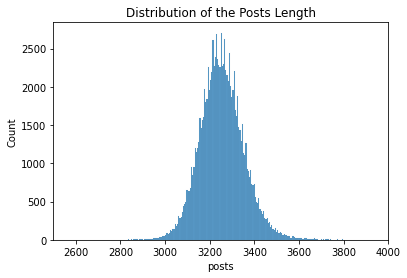

In [15]:
#Plot to show the distribution of Lengths of all Posts
df = df_vis["posts"].apply(len)
length_fig = sns.histplot(df)
length_fig.set_title("Distribution of the Posts Length")
length_fig.set_xlim(2500,4000)

In [16]:
# Create a binary column for each of the 4 dimension types
df_vis['Mind'] = df_vis['type'].map(lambda x: 'Extroverted' if x[0] == 'E' else 'Introverted')
df_vis['Nature'] = df_vis['type'].map(lambda x: 'Thinking'  if x[2] == 'T' else 'Feeling')
df_vis['Tactics'] = df_vis['type'].map(lambda x: 'Judging'  if x[3] == 'J' else 'Perceiving')
df_vis['Energy'] = df_vis['type'].map(lambda x: 'Intuitive' if x[1] == 'N' else 'Sensing')

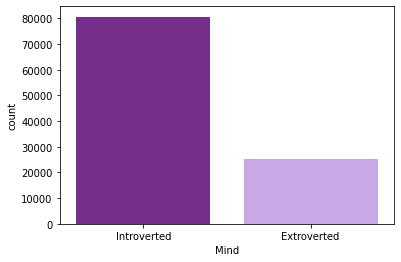

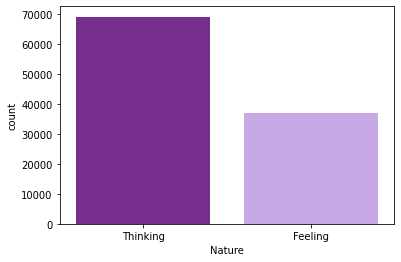

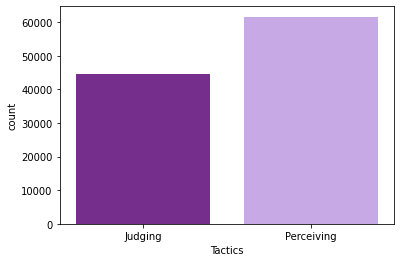

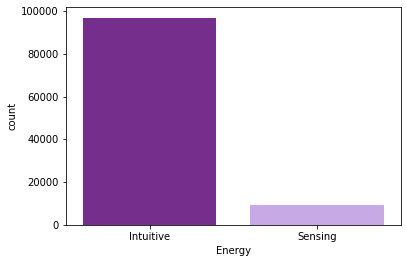

In [17]:
Bar_Plot_colors = sns.xkcd_palette(['purple', 'lavender'])
personalities = df_vis.loc[: , "Mind":"Energy"].columns
for personality in personalities:
  sns.set_palette(Bar_Plot_colors)
  sns.countplot(x=df_vis[personality],data=df_vis)
  plt.show()

In [18]:
df_vis['words_per_post'] = df_vis['posts'].apply(lambda x: len(x.split()))
axes = (('Extrovert-Introvert', df_vis['Mind']), ('Intuitive-Sensing', df_vis['Energy']),
        ('Feeling-Thinking', df_vis['Nature']), ('Judging-Percieving',df_vis['Tactics']))

Mean word count by Extrovert-Introvert Category: Mind
Extroverted    500.091256
Introverted    499.997335
Name: words_per_post, dtype: float64
Mean word count by Intuitive-Sensing Category: Energy
Intuitive    499.991184
Sensing      500.321269
Name: words_per_post, dtype: float64
Mean word count by Feeling-Thinking Category: Nature
Feeling     500.045519
Thinking    500.006127
Name: words_per_post, dtype: float64
Mean word count by Judging-Percieving Category: Tactics
Judging       500.068234
Perceiving    499.984910
Name: words_per_post, dtype: float64


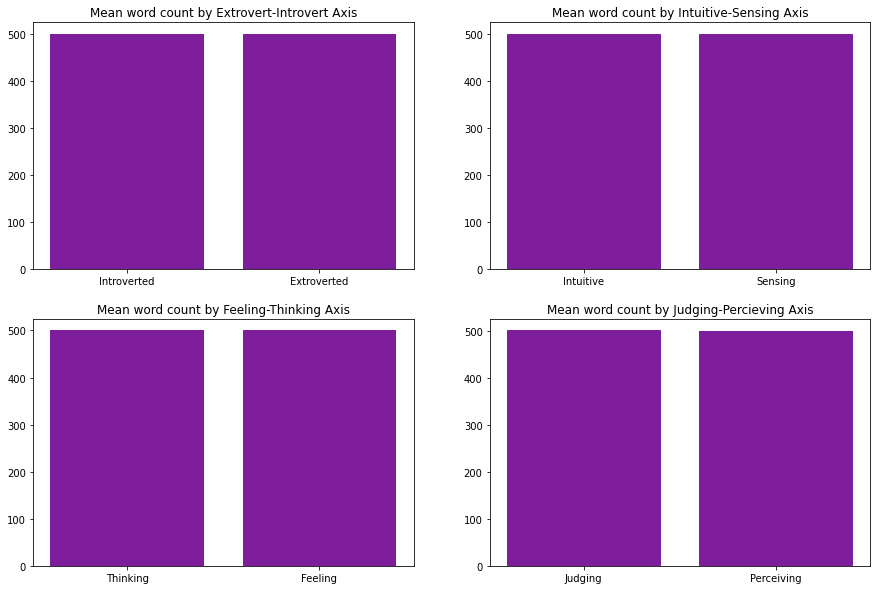

In [19]:
fig, ax = plt.subplots(2,2, figsize=(15,10))
plots = [(0,0), (0,1), (1,0), (1,1)]
obs = 0

for x, y in axes:
    ax[plots[obs]].set_title('Mean word count by {} Axis'.format(x))
    ax[plots[obs]].bar(y.unique(),df_vis['words_per_post'].groupby(y).mean())
    obs =obs + 1
    print('Mean word count by {} Category: {}'.format(x,df_vis['words_per_post'].groupby(y).mean()))


In [20]:
stop_words=set(stopwords.words('english'))
'''
def generate_wordcloud(text, title):
    wordcloud = WordCloud(background_color="white",width = 400 , height = 300,stopwords = stop_words).generate(text)
    plt.subplots(1 , 1 , figsize = [20,6])
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title, fontsize = 40)
    plt.show()
'''

'\ndef generate_wordcloud(text, title):\n    wordcloud = WordCloud(background_color="white",width = 400 , height = 300,stopwords = stop_words).generate(text)\n    plt.subplots(1 , 1 , figsize = [20,6])\n    plt.imshow(wordcloud, interpolation=\'bilinear\')\n    plt.axis("off")\n    plt.title(title, fontsize = 40)\n    plt.show()\n'

In [21]:
'''
for i, title_text in enumerate(df_vis['type']):
  text = df_vis.iloc[i,1]
  generate_wordcloud(text, title_text)
  '''

"\nfor i, title_text in enumerate(df_vis['type']):\n  text = df_vis.iloc[i,1]\n  generate_wordcloud(text, title_text)\n  "

In [22]:
def MBTI_Class_Wordcloud(data, type_column, column, size, fig_size=(15,10)):
    classes = data[type_column].unique()
    fig, ax = plt.subplots(len(classes), figsize=fig_size)
    append = 0
    for c in classes:
        temp = data[data[type_column] == c]
        wordcloud = WordCloud(background_color="white").generate(temp[column].to_string())
        plt.subplot(*size, append+1)
        plt.title(c, size=25)
        plt.imshow(wordcloud)
        plt.axis("off")
        append = append + 1

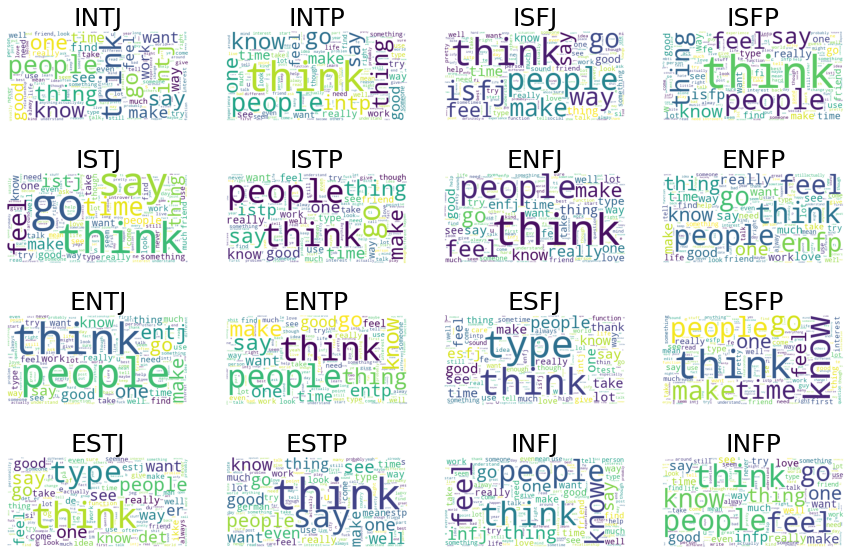

In [23]:
MBTI_Class_Wordcloud(df_vis, type_column="type" , column="posts", size=(4,4))

In [24]:
def Most_Frequent_Words(data, stop_words, column="posts", top=20):
    df = data[column].apply(lambda x: " ".join([word for word in x.split() if not word in stop_words]))
    counter = Counter(" ".join(df).split())
    return counter.most_common(top)

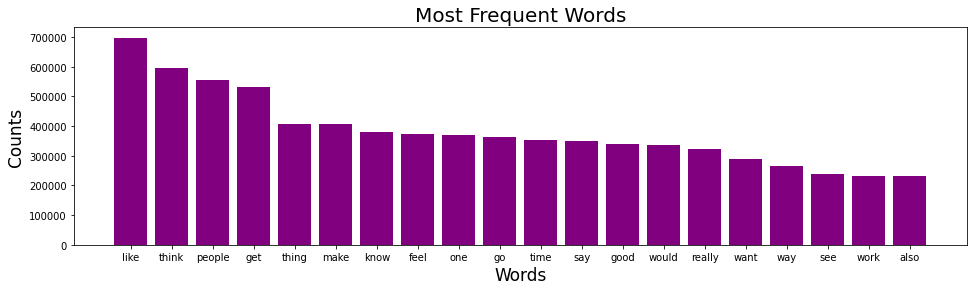

In [25]:
def Fig_Frequent_Words(repetitive_words, top=20):
    most_frequent_df = pd.DataFrame(repetitive_words)    
    plt.figure(figsize=(16,4))
    plt.bar(x=most_frequent_df.iloc[:top, 0], height=most_frequent_df.iloc[:top, 1], color="purple")
    plt.xlabel("Words", size=17)
    plt.ylabel("Counts", size=17)
    plt.title("Most Frequent Words", size = 20)
    plt.show()
Fig_Frequent_Words(Most_Frequent_Words(df_vis, stop_words))

TEXT PREPROCESSING

In [26]:
def divide_types(df):
    df["E-I"] = ""
    df["N-S"] = ""
    df["F-T"] = ""
    df["J-P"] = ""
    for index, row in df.iterrows():
        row["E-I"] = "E" if row.type[0] == "E" else "I"
        row["N-S"] = "N" if row.type[1] == "N" else "S"
        row["F-T"] = "F" if row.type[2] == "F" else "T"
        row["J-P"] = "J" if row.type[3] == "J" else "P"
    return df

In [27]:
# Removing delimeters by replacing the post separators with empty space 
def Remove_delimiters(post):
    new = post.replace('|||',' ')
    return ' '.join(new.split())

In [28]:
#Convert all Text to lowercase
def convert_lower(post):
   text = post.lower()
   return text

In [29]:
#Remove URLs
def remove_url(post):
  text = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ', post)
  return text

In [30]:
def Strip_Punctation(post):
  text = re.sub(r'[\.+]', ".",post)
  return text

In [31]:
def Remove_multiple_fullstops(post):
  text= re.sub(r'[^\w\s]','',post)
  return text

In [32]:
def Remove_Nonwords(post):
  text= re.sub(r'[^a-zA-Z\s]','',post)
  return text

In [33]:
def Remove_Numbers(post):
  text = re.sub(r'[0-9]', '', post)
  return text

In [34]:
#Remove multiple letter repeating words
def Remove_Repeating_Letters(post):
    text = re.sub(r'([a-z])\1{2,}[\s|\w]*','',post)
    return text

In [35]:
#Remove Extremely Long Words
def Remove_long_words(post):
  text = re.sub(r'(\b\w{40,1000})?\b','',post)
  return text

In [36]:
def text_pre_process(post):
  post = Remove_delimiters(post)
  post =convert_lower(post)
  post = remove_url(post)
  post = Strip_Punctation(post)
  post = Remove_multiple_fullstops(post)
  post = Remove_Nonwords(post)
  post = Remove_Numbers(post)
  post = Remove_Repeating_Letters(post)
  post = Remove_long_words(post)
  return post

In [37]:
df_Clean= divide_types(df_MBTI)

In [38]:
df_Clean.head()

,posts,type,E-I,N-S,F-T,J-P
0,know intj tool use interaction people excuse a...,INTJ,I,N,T,J
1,rap music ehh opp yeah know valid well know fa...,INTJ,I,N,T,J
2,preferably p hd low except wew lad video p min...,INTJ,I,N,T,J
3,drink like wish could drink red wine give head...,INTJ,I,N,T,J
4,space program ah bad deal meing freelance max ...,INTJ,I,N,T,J


In [39]:
df_Clean['Cleaned_posts']= df_Clean['posts'].apply(lambda text_clean: text_pre_process(text_clean))

In [40]:
df_Clean.head()

,posts,type,E-I,N-S,F-T,J-P,Cleaned_posts
0,know intj tool use interaction people excuse a...,INTJ,I,N,T,J,know intj tool use interaction people excuse a...
1,rap music ehh opp yeah know valid well know fa...,INTJ,I,N,T,J,rap music ehh opp yeah know valid well know fa...
2,preferably p hd low except wew lad video p min...,INTJ,I,N,T,J,preferably p hd low except wew lad video p min...
3,drink like wish could drink red wine give head...,INTJ,I,N,T,J,drink like wish could drink red wine give head...
4,space program ah bad deal meing freelance max ...,INTJ,I,N,T,J,space program ah bad deal meing freelance max ...


In [41]:
#removing URLs and punctuation from dataset
'''
for index in df.index.values:
  df.posts.iloc[index] = ' '.join(df.posts.iloc[index].split('|||'))
  df.posts.iloc[index] = re.sub(r"http\S+","",df.posts.iloc[index])
  df.posts.iloc[index] = re.sub(r"[-/@.?!_,:;()|0-9]","",df.posts.iloc[index])
  df.posts.iloc[index] = ' '.join(df.posts.iloc[index].split('  '))
'''

'\nfor index in df.index.values:\n  df.posts.iloc[index] = \' \'.join(df.posts.iloc[index].split(\'|||\'))\n  df.posts.iloc[index] = re.sub(r"http\\S+","",df.posts.iloc[index])\n  df.posts.iloc[index] = re.sub(r"[-/@.?!_,:;()|0-9]","",df.posts.iloc[index])\n  df.posts.iloc[index] = \' \'.join(df.posts.iloc[index].split(\'  \'))\n'

In [42]:
'''
from nltk.corpus import stopwords

# Lisr of english stopwords
stopwords = nltk.corpus.stopwords.words("english")

# Extend the list unwanted personalities
my_stopwords = ['infj', 'intp', 'infp', 'enfp', 'intj', 'entp', 'istp', 'entj', 'isfp', 'enfj', 'isfj', 'istj', 'estp', 'esfp', 'estj', 'esfj']
stopwords.extend(my_stopwords)
'''

'\nfrom nltk.corpus import stopwords\n\n# Lisr of english stopwords\nstopwords = nltk.corpus.stopwords.words("english")\n\n# Extend the list unwanted personalities\nmy_stopwords = [\'infj\', \'intp\', \'infp\', \'enfp\', \'intj\', \'entp\', \'istp\', \'entj\', \'isfp\', \'enfj\', \'isfj\', \'istj\', \'estp\', \'esfp\', \'estj\', \'esfj\']\nstopwords.extend(my_stopwords)\n'

In [43]:
'''
# Remove MBTI Abbreviations and Stopwords in Posts
df_Clean['Cleaned_posts'] = df_Clean['Cleaned_posts'].apply(lambda x: [item for item in x if item not in stopwords])
df_Clean.head(3)
'''

"\n# Remove MBTI Abbreviations and Stopwords in Posts\ndf_Clean['Cleaned_posts'] = df_Clean['Cleaned_posts'].apply(lambda x: [item for item in x if item not in stopwords])\ndf_Clean.head(3)\n"

In [44]:
#Remove MBTI Abbreviations and Stopwords in Posts
def Remove_Stopwords(df_MBTI):
    stop_words = set(stopwords.words('english'))
    stop_words = set(['infj', 'intp', 'infp', 'enfp', 'intj', 'entp', 'istp', 'entj', 'isfp', 'enfj', 'isfj', 'istj', 'estp', 'esfp', 'estj', 'esfj'])

    count = 0
    for post in df_MBTI:
        post = [word for word in post.lower().split() if word not in stop_words]
        post = ' '.join(post)
        df_MBTI.loc[count] = post
        count = count + 1
    return(df_MBTI)

In [45]:
df_Clean['Cleaned_posts'] = Remove_Stopwords(df_Clean['Cleaned_posts'])

In [46]:
df_Clean.head()

,posts,type,E-I,N-S,F-T,J-P,Cleaned_posts
0,know intj tool use interaction people excuse a...,INTJ,I,N,T,J,know tool use interaction people excuse antiso...
1,rap music ehh opp yeah know valid well know fa...,INTJ,I,N,T,J,rap music ehh opp yeah know valid well know fa...
2,preferably p hd low except wew lad video p min...,INTJ,I,N,T,J,preferably p hd low except wew lad video p min...
3,drink like wish could drink red wine give head...,INTJ,I,N,T,J,drink like wish could drink red wine give head...
4,space program ah bad deal meing freelance max ...,INTJ,I,N,T,J,space program ah bad deal meing freelance max ...


In [47]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [48]:
def Apply_Lemmatization(df_MBTI):

    lmtzr = WordNetLemmatizer()

    count = 0
    stemmed = []
    for sentence in df_MBTI:    
        word_tokens = word_tokenize(sentence)
        for word in word_tokens:
            stemmed.append(lmtzr.lemmatize(word))
        sentence = ' '.join(stemmed)
        df_MBTI.iloc[count] = sentence
        count+=1
        stemmed = []
    return(df_MBTI)


In [50]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [51]:
df_Clean['Cleaned_posts'] = Apply_Lemmatization(df_Clean['Cleaned_posts'])

In [52]:
df_Clean.head()

,posts,type,E-I,N-S,F-T,J-P,Cleaned_posts
0,know intj tool use interaction people excuse a...,INTJ,I,N,T,J,know tool use interaction people excuse antiso...
1,rap music ehh opp yeah know valid well know fa...,INTJ,I,N,T,J,rap music ehh opp yeah know valid well know fa...
2,preferably p hd low except wew lad video p min...,INTJ,I,N,T,J,preferably p hd low except wew lad video p min...
3,drink like wish could drink red wine give head...,INTJ,I,N,T,J,drink like wish could drink red wine give head...
4,space program ah bad deal meing freelance max ...,INTJ,I,N,T,J,space program ah bad deal meing freelance max ...


In [54]:
df_final=df_Clean[['Cleaned_posts','type']]
df_final.head()

,Cleaned_posts,type
0,know tool use interaction people excuse antiso...,INTJ
1,rap music ehh opp yeah know valid well know fa...,INTJ
2,preferably p hd low except wew lad video p min...,INTJ
3,drink like wish could drink red wine give head...,INTJ
4,space program ah bad deal meing freelance max ...,INTJ


In [ ]:
from google.colab import files
df_final.to_csv('/content/New-MBTI-df.csv') 
files.download('New-MBTI-df.csv')

In [58]:
df_final.to_csv('/content/New-mbti-df.csv') 